# Исследование зависимости плотности распределения от параметров НСВ


In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [2]:
def show_pdf(pdf, xmin, xmax, grid_size, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)

    plt.figure(figsize=(6, 3))
    plt.plot(X, Y)
    plt.grid(True, alpha=0.3)
    plt.xlabel("x")
    plt.ylabel("φ(x)")
    plt.xlim((xmin, xmax))
    plt.ylim(-0.05, np.max(Y) + 0.05)
    plt.title("Плотность распределения")
    plt.show()


## Равномерное распределение

Случайная величина $X \sim R(a, b)$ имеет плотность распределения

$$
\phi(x) =
\begin{cases}
\dfrac{1}{b-a}, & a \le x \le b \\
0, & \text{иначе}
\end{cases}
$$

Математическое ожидание и дисперсия:

$
\mathbb{M} = \frac{a+b}{2}, \qquad
\mathbb{D} = \frac{(b-a)^2}{12}
$


In [3]:
widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    grid_size=widgets.IntSlider(min=50, max=1000, step=50, value=200),
    xmin=widgets.FloatSlider(min=-5, max=10, step=0.1, value=0),
    xmax=widgets.FloatSlider(min=0, max=20, step=0.1, value=10),
    loc=widgets.FloatSlider(min=0, max=10, step=0.1, value=2, description="a"),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.1, value=4, description="b-a")
)


interactive(children=(FloatSlider(value=0.0, description='xmin', max=10.0, min=-5.0), FloatSlider(value=10.0, …

In [4]:
a = 2
b = 6
n = 100_000

sample = np.random.uniform(a, b, n)

print("Выборочное матожидание:", np.mean(sample))
print("Теоретическое матожидание:", (a + b) / 2)

print("Выборочная дисперсия:", np.var(sample))
print("Теоретическая дисперсия:", (b - a)**2 / 12)


Выборочное матожидание: 4.000035845155187
Теоретическое матожидание: 4.0
Выборочная дисперсия: 1.3248481575317603
Теоретическая дисперсия: 1.3333333333333333


## Экспоненциальное распределение

Случайная величина $X \sim \mathrm{Exp}(\lambda)$ имеет плотность

$$
\phi(x) = \lambda e^{-\lambda x}, \quad x \ge 0
$$

Математическое ожидание и дисперсия:

$
\mathbb{M} = \frac{1}{\lambda}, \qquad
\mathbb{D} = \frac{1}{\lambda^2}
$


In [ ]:
widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    grid_size=widgets.IntSlider(min=50, max=1000, step=50, value=200),
    xmin=widgets.FloatSlider(min=0, max=5, step=0.1, value=0),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10),
    scale=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=2, description="1/λ")
)


interactive(children=(FloatSlider(value=0.0, description='xmin', max=5.0), FloatSlider(value=10.0, description…

In [6]:
scale = 2
n = 100_000

sample = np.random.exponential(scale, n)

print("Выборочное матожидание:", np.mean(sample))
print("Теоретическое матожидание:", scale)

print("Выборочная дисперсия:", np.var(sample))
print("Теоретическая дисперсия:", scale**2)


Выборочное матожидание: 1.9972826614364556
Теоретическое матожидание: 2
Выборочная дисперсия: 3.967206546462004
Теоретическая дисперсия: 4


## Нормальное распределение

Случайная величина $X \sim N(a, \sigma)$ имеет плотность

$$
\phi(x) = \frac{1}{\sigma \sqrt{2\pi}}
\exp\left( -\frac{(x-a)^2}{2\sigma^2} \right)
$$

Математическое ожидание и дисперсия:

$
\mathbb{M} = a, \qquad
\mathbb{D} = \sigma^2
$


In [7]:
widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    grid_size=widgets.IntSlider(min=50, max=1000, step=50, value=200),
    xmin=widgets.FloatSlider(min=-10, max=0, step=0.1, value=-5),
    xmax=widgets.FloatSlider(min=0, max=10, step=0.1, value=5),
    loc=widgets.FloatSlider(min=-5, max=5, step=0.1, value=0, description="a"),
    scale=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=1, description="σ")
)


interactive(children=(FloatSlider(value=-5.0, description='xmin', max=0.0, min=-10.0), FloatSlider(value=5.0, …

In [8]:
mu = 1
sigma = 2
n = 100_000

sample = np.random.normal(mu, sigma, n)

print("Выборочное матожидание:", np.mean(sample))
print("Теоретическое матожидание:", mu)

print("Выборочная дисперсия:", np.var(sample))
print("Теоретическая дисперсия:", sigma**2)


Выборочное матожидание: 0.9950671890226912
Теоретическое матожидание: 1
Выборочная дисперсия: 3.976810115494956
Теоретическая дисперсия: 4


# Логнормальное распределение

Рассматривается случайная величина 
$$
X \sim \mathrm{LN}(\mu, \sigma),
$$
если логарифм случайной величины $\ln X$ имеет нормальное распределение:
$$
\ln X \sim N(\mu, \sigma).
$$

Логнормальное распределение используется для моделирования
положительных величин, таких как доходы, цены, время жизни устройств и т.д.


## Теоретическая часть

Плотность логнормального распределения имеет вид:

$$
f(x) =
\frac{1}{x \sigma \sqrt{2\pi}}
\exp\left(
-\frac{(\ln x - \mu)^2}{2\sigma^2}
\right), \quad x > 0
$$

где:
- $\mu$ — математическое ожидание $\ln X$,
- $\sigma$ — стандартное отклонение $\ln X$.


### Математическое ожидание и дисперсия

Для логнормального распределения справедливы формулы:

$
\mathbb{M}[X] = e^{\mu + \frac{\sigma^2}{2}}
$

$
\mathbb{D}[X] =
\left(e^{\sigma^2} - 1\right)e^{2\mu + \sigma^2}
$


In [ ]:
widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.lognorm.pdf),
    grid_size=widgets.IntSlider(min=50, max=1000, step=50, value=200),
    xmin=widgets.FloatSlider(min=0.01, max=1, step=0.01, value=0.01),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10),
    s=widgets.FloatSlider(min=0.1, max=2, step=0.1, value=0.5, description="σ"),
    scale=widgets.FloatSlider(min=0.5, max=5, step=0.1, value=1, description="e^μ")
)


interactive(children=(FloatSlider(value=0.01, description='xmin', max=1.0, min=0.01, step=0.01), FloatSlider(v…

## Проверка матожидания и дисперсии

Сравним выборочные характеристики с теоретическими значениями.

Теоретические формулы:
$
\mathbb{M}[X] = e^{\mu + \frac{\sigma^2}{2}},
\quad
\mathbb{D}[X] =
\left(e^{\sigma^2} - 1\right)e^{2\mu + \sigma^2}
$


In [15]:
mu = 0.5
sigma = 0.7
n = 100_000

sample = np.random.lognormal(mean=mu, sigma=sigma, size=n)

mean_sample = np.mean(sample)
var_sample = np.var(sample)

mean_theor = np.exp(mu + sigma**2 / 2)
var_theor = (np.exp(sigma**2) - 1) * np.exp(2*mu + sigma**2)

print("Выборочное матожидание:", mean_sample)
print("Теоретическое матожидание:", mean_theor)

print("Выборочная дисперсия:", var_sample)
print("Теоретическая дисперсия:", var_theor)


Выборочное матожидание: 2.108183875851637
Теоретическое матожидание: 2.1064414349807272
Выборочная дисперсия: 2.7881940028281127
Теоретическая дисперсия: 2.805647466157347


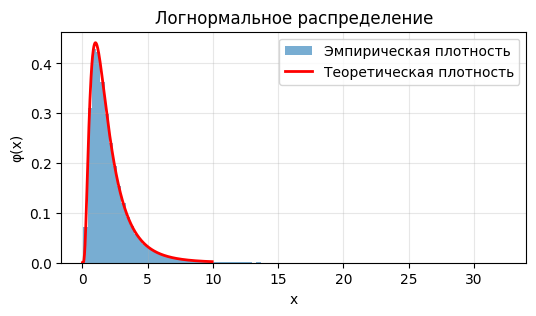

In [16]:
x = np.linspace(0.01, np.percentile(sample, 99.5), 500)

plt.figure(figsize=(6, 3))
plt.hist(sample, bins=100, density=True, alpha=0.6, label="Эмпирическая плотность")
plt.plot(x, sts.lognorm.pdf(x, s=sigma, scale=np.exp(mu)), 
         'r', lw=2, label="Теоретическая плотность")
plt.xlabel("x")
plt.ylabel("φ(x)")
plt.title("Логнормальное распределение")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


## Вывод

Было исследовано логнормальное распределение как пример
непрерывной случайной величины, отличной от рассмотренных ранее.

Показано влияние параметров $\mu$ и $\sigma$ на форму плотности,
а также подтверждено совпадение выборочных характеристик
с теоретическими значениями математического ожидания и дисперсии.
